## Unidade 01 - Projeto 01

- **Aluno**: Ailson Forte dos Santos
- **Matrícula**: 2016041269

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
arquivo = 'imd_notas_02.xlsx'
excel = pd.ExcelFile(arquivo)
dados = excel.parse(0)
dados.head()

,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,enen-nota,bairro
0,0,59015430,2014,1,CANCELADO,2014,2,2.6,0,Reprovado,618.0,Tirol
1,0,59015430,2014,1,CANCELADO,2015,1,8.0,0,Aprovado,618.0,Tirol
2,1,59073120,2014,1,CANCELADO,2014,2,0.1,0,Reprovado,615.0,Planalto
3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,600.0,Cidade Nova
4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,673.0,Neópolis


#### 1)  Quantas vezes um aluno precisa fazer uma determinada disicplina para ter aprovação?
    a) Por disciplina?
    b) Geral (considerando as 7  disciplinas)?

In [2]:
discs = {} # disciplinas(keys) e seus alunos(values)
qtd_disc = [] # quantidade de alunos distintos em cada disciplina
for i in dados['disciplina_ID'].unique():
    discs[i] = []
    qtd_disc.append([])
for row in dados.get_values():
    elem = row.tolist()
    discs[elem[8]].append(row)
print('a)')
for i in dados['disciplina_ID'].unique():
    for l in discs[i]:
        aluno = l[0]
        if aluno not in qtd_disc[i]:
            qtd_disc[i].append(aluno)
    print('Disciplina ' + str(i) + ' - ' + str(len(discs[i])/len(qtd_disc[i])))
print('b)')
qtd = 0
for i in dados['disciplina_ID'].unique():
    qtd = qtd + len(discs[i])/len(qtd_disc[i])
print(qtd/7)

a)
Disciplina 0 - 1.3987473903966596
Disciplina 1 - 1.044414535666218
Disciplina 2 - 1.2035398230088497
Disciplina 3 - 1.4821917808219178
Disciplina 4 - 1.0715421303656598
Disciplina 5 - 1.497131931166348
Disciplina 6 - 1.2516129032258065
b)
1.27845435637878


#### 2) Quais as regiões tem mais índices de aprovação nos componentes curriculares? Bar.

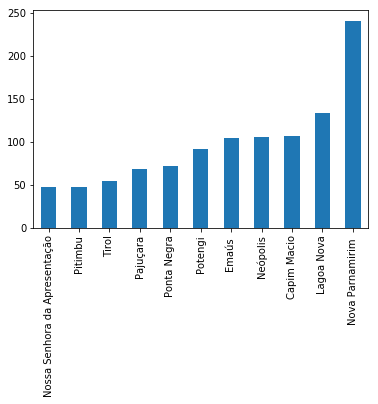

In [3]:
%matplotlib inline
bairros = {}
for i in  dados['bairro'].unique():
    bairros[i] = 0
for row in dados.get_values():
    l = row.tolist()
    if row[9] == 'Aprovado':
        bairros[l[11]] = bairros[l[11]] + 1
plt_bairros = pd.DataFrame.from_dict(bairros,orient='index')
plt_bairros.sort_values(0,inplace=True,ascending=False)
plt_bairros = plt_bairros[1:12]
plt_bairros.sort_values(0,inplace=True)
plt_bairros.plot(kind='bar',legend=False)

#### 3) Como estão caracterizados a  estatística de notas das diversas disciplinas que compoe o dataset? Boxplot
    a) Período (ano)
    b) Geral

a)


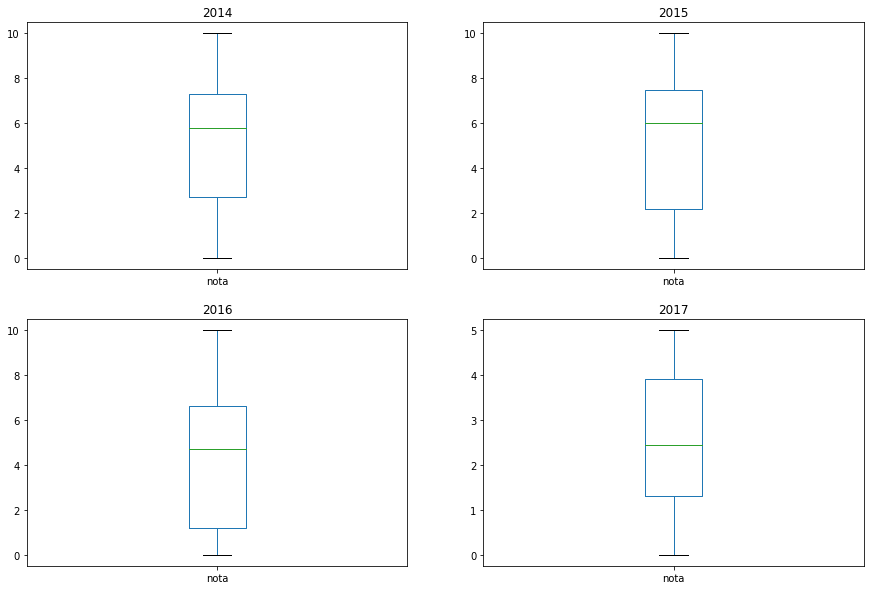

In [4]:
ano_geral = {} # disciplinas(keys) e seus alunos(values)
columns = list(dados.columns)
for i in dados['ano_disciplina'].unique():
    ano_geral[i] = {}
for i in dados['ano_disciplina'].unique():
    for c in columns:
        ano_geral[i][c] = []
for row in dados.get_values(): # separando os dados de cada aluno no respetivo ano em que cursou a disciplina
    for j, c in enumerate(columns):
        ano_geral[row[5]][c].append(row[j])
fig = plt.figure(figsize=(15,10))
print('a)')
for i in dados['ano_disciplina'].unique(): # fazendo um dataframe pra cada disciplina
    ano_geral[i] = pd.DataFrame.from_dict(ano_geral[i])
    ax = fig.add_subplot(len(dados['ano_disciplina'].unique())/2,len(dados['ano_disciplina'].unique())/2,i-2013)
    ax = ano_geral[i].plot(kind='box',title=i,y='nota',x='disciplina_ID',ax=ax)

b)


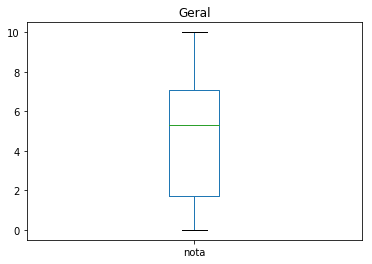

In [5]:
print('b)')
dados.plot(kind='box',y='nota',x='disciplina_ID',title='Geral')

#### 4) Existe correlação entre as notas dos diferentes componentes curriculares? Dispersão

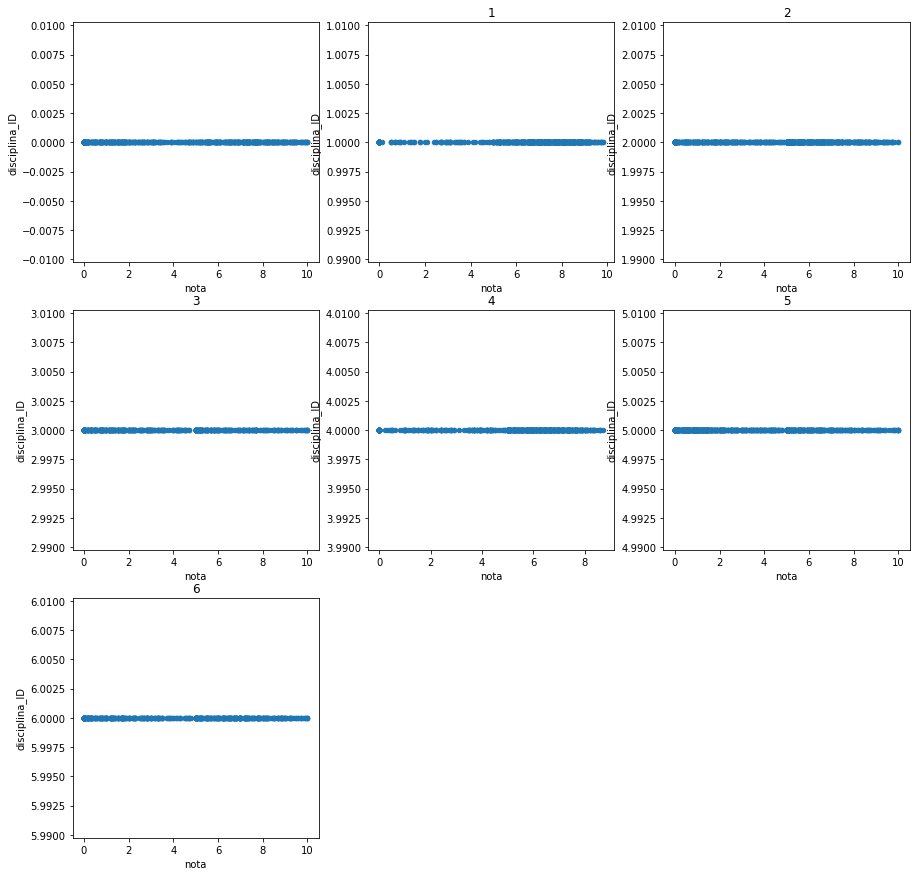

In [38]:
discs_geral = {} # disciplinas(keys) e seus alunos(values)
columns = list(dados.columns)
for i in dados['disciplina_ID'].unique():
    discs_geral[i] = {}
for i in dados['disciplina_ID'].unique():
    for c in columns:
        discs_geral[i][c] = []
for row in dados.get_values(): # separendo os dados de cada aluno na respectiva disciplina
    for j, c in enumerate(columns):
        discs_geral[row[8]][c].append(row[j])
fig = plt.figure(figsize=(15,15))
for i in dados['disciplina_ID'].unique(): # fazendo um dataframe pra cada disciplina
    discs_geral[i] = pd.DataFrame.from_dict(discs_geral[i])
    ax = fig.add_subplot(len(dados['disciplina_ID'].unique())/2,len(dados['disciplina_ID'].unique())/2,i+1)
    ax = discs_geral[i].plot(kind='scatter',title=i,x='nota',y='disciplina_ID',ax=ax)

#### 5) Existe uma relação entre o  número médio de disciplinas cursadas por aluno e  o  seu desempenho? Dispersão

#### 6) Existe correlação entre a  nota do enen e  o  status do aluno? Hist.

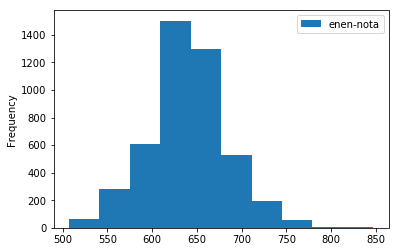

In [17]:
dados.plot(kind='hist',x='status',y='enen-nota')

#### 7) Existe algum componente curricular na base de dados que possui uma alta correlação com os dados do ENEN? Disperção